# Students Performance in Exams
## Marks secured by the students in various subjects

You can download the dataset from here https://www.kaggle.com/spscientist/students-performance-in-exams

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

sns.set_style('whitegrid')
sns.set_style()

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
StudentPerformance = df.copy()
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. EDA

## 1.1) Handling NaN values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

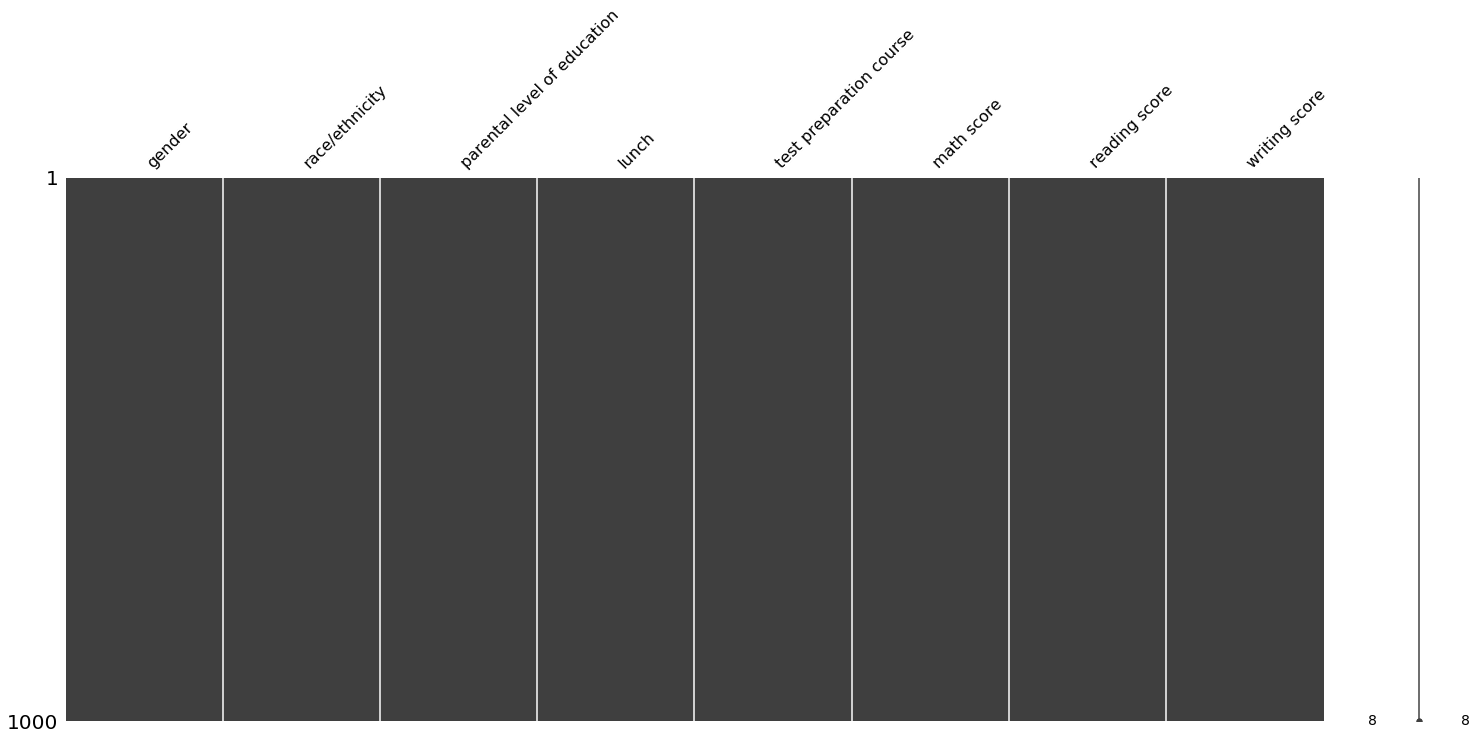

In [9]:
msno.matrix(df)

#### Great, there are no missing values.

## 1.2) Exploring Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

There are 1000 rows and 8 columns = 8000 data values in this dataset.

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1.2.1) GENDER Classification

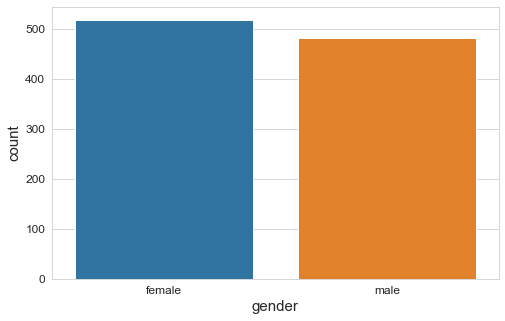

In [50]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('gender', fontsize=15)
plt.ylabel('count', fontsize=15)
sns.countplot('gender', data=df)

In [70]:
print('Total Number of Students: ', len(df.gender))
print(df['gender'].value_counts())

Total Number of Students:  1000
female    518
male      482
Name: gender, dtype: int64


#### No. of Female students > No. of male students

## 1.2.2) RACE Classification

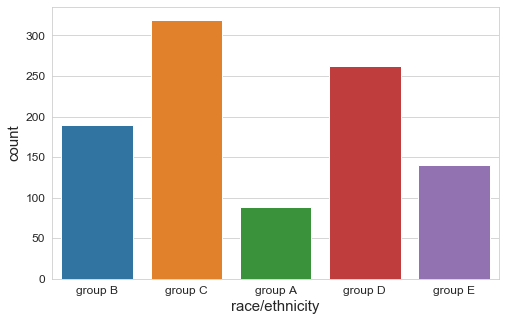

In [52]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('race/ethnicity', fontsize=15)
plt.ylabel('count', fontsize=15)
sns.countplot('race/ethnicity', data=df)

In [73]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

#### No. of students of group C are maximum and no. of students of group A are minimum.

## 1.2.3) Parental level of education

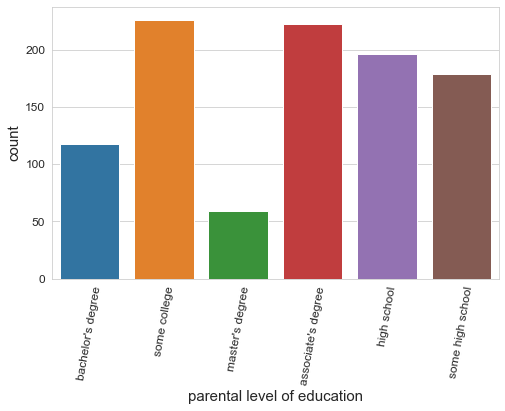

In [77]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12, rotation=80)
plt.yticks(fontsize=12)
plt.xlabel('parental level of education', fontsize=15)
plt.ylabel('count', fontsize=15)
sns.countplot('parental level of education', data=df)

In [78]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

#### Maximum Parents have education level of some college and Minimum Parents have master's degree.

## 1.2.4) Lunch type

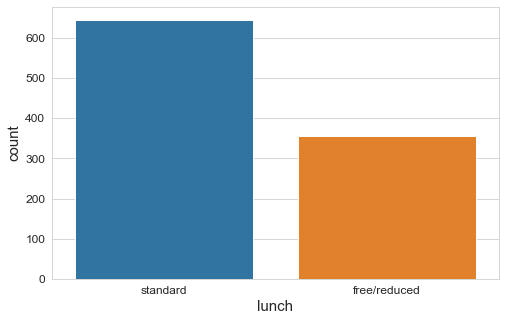

In [80]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Lunch', fontsize=15)
plt.ylabel('count', fontsize=15)
sns.countplot('lunch', data=df)

In [81]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

#### No. of students eat standard lunch > No. of students eat free/reduced lunch, maybe because they are financially weak.

## 1.2.5) Test Preparation Course

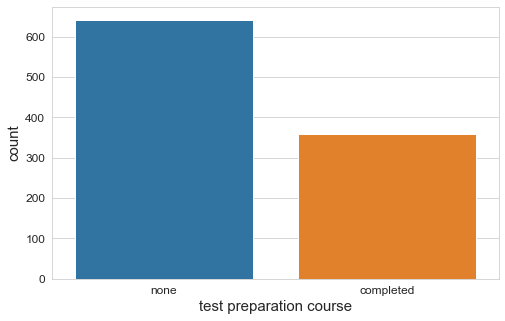

In [84]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Test Preparation Course', fontsize=15)
plt.ylabel('count', fontsize=15)
sns.countplot('test preparation course', data=df)

In [86]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

#### No. of students Completed Test preparation course < No. of students who did not took the course or didn't completed the course.
##### There can be many reasons:
##### 1. The course was expensive and poor students could not afford it.
##### 2. The course was difficult to complete.
##### 3. Many students quit the course.
##### 4. Some students didn't need the test preparation course.
#####    and many more reasons.

## 1.2.6) Math Score

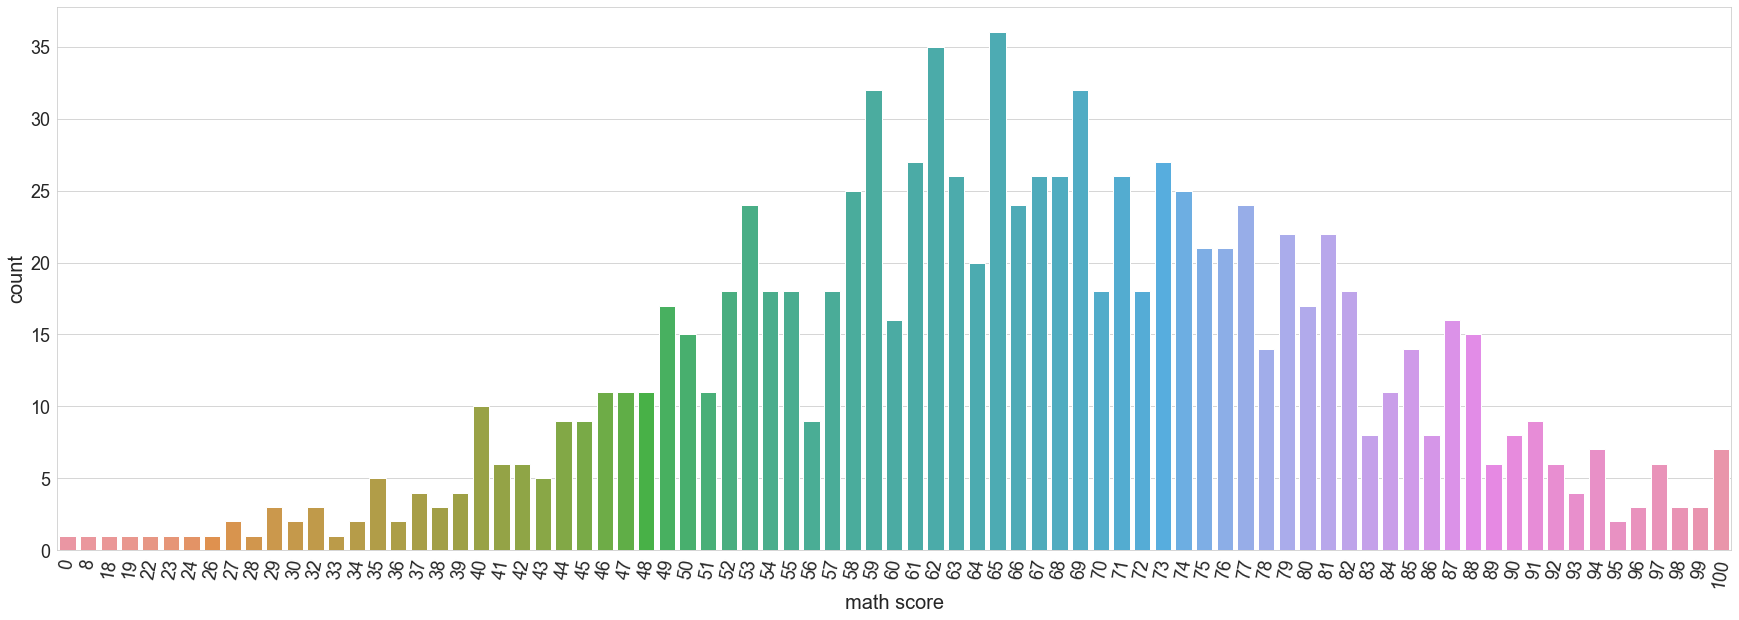

In [104]:
plt.figure(figsize=(30,10))
plt.xticks(fontsize=18, rotation=80)
plt.yticks(fontsize=18)
plt.xlabel('math score', fontsize=20)
plt.ylabel('count', fontsize=20)
sns.countplot('math score', data=df)

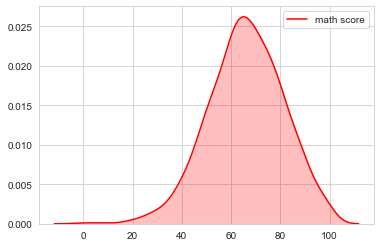

In [114]:
sns.kdeplot(df['math score'], shade=True, color='r')

In [122]:
df['math score'].mean()

66.089

#### Average maths marks of 1000 students is : 66.089

## 1.2.7) Reading Score

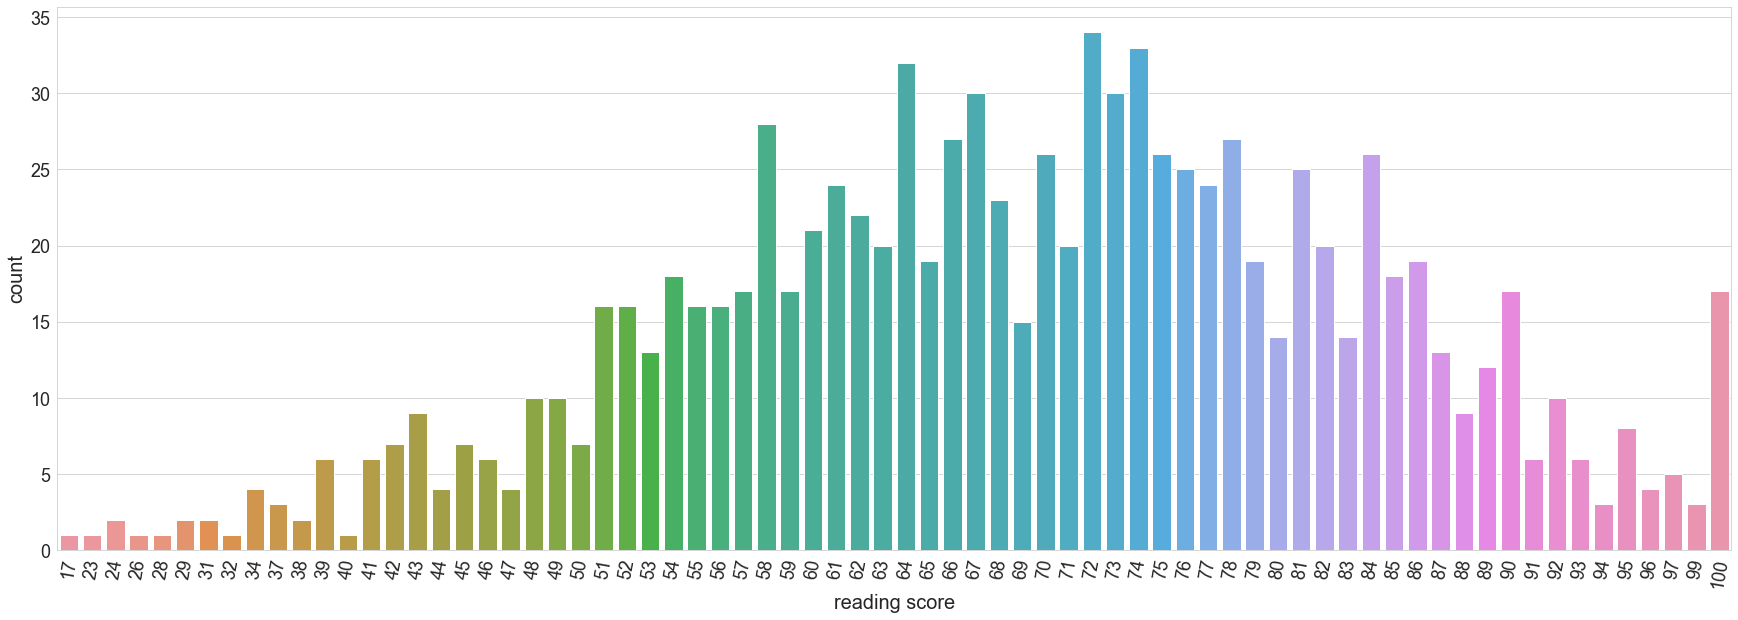

In [125]:
plt.figure(figsize=(30,10))
plt.xticks(fontsize=18, rotation=80)
plt.yticks(fontsize=18)
plt.xlabel('reading score', fontsize=20)
plt.ylabel('count', fontsize=20)
sns.countplot('reading score', data=df)

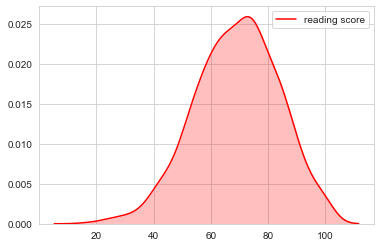

In [132]:
sns.kdeplot(df['reading score'], shade=True, color='r')

In [127]:
df['reading score'].mean()

69.169

#### Average reading score: 69.169

## 1.2.8) Writing Score

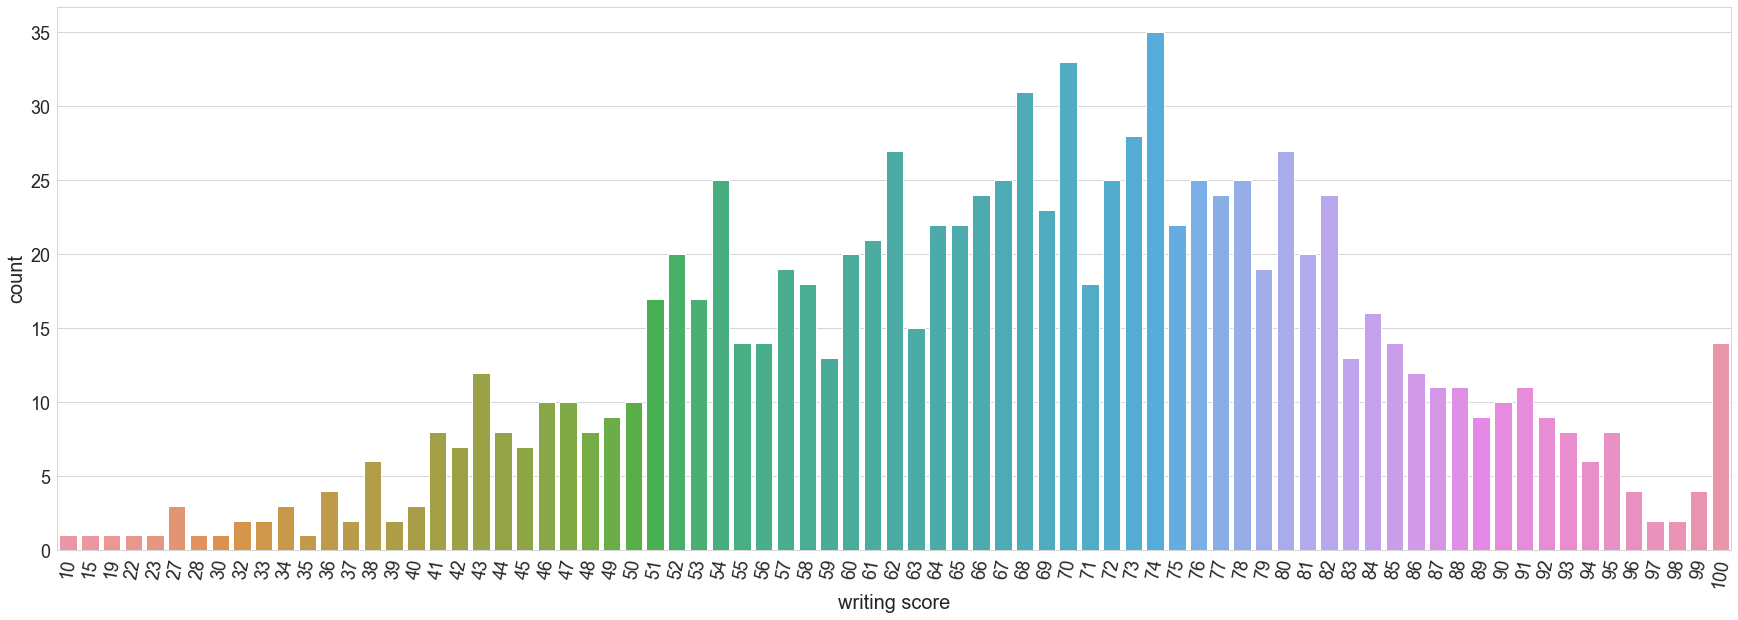

In [128]:
plt.figure(figsize=(30,10))
plt.xticks(fontsize=18, rotation=80)
plt.yticks(fontsize=18)
plt.xlabel('writing score', fontsize=20)
plt.ylabel('count', fontsize=20)
sns.countplot('writing score', data=df)

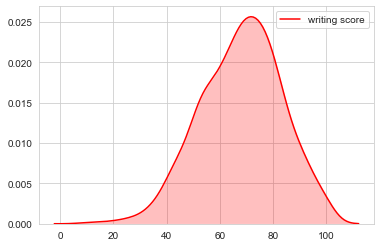

In [131]:
sns.kdeplot(df['writing score'], shade=True, color='r')

In [130]:
df['writing score'].mean()

68.054

#### Average Writing score: 68.054

## Let's visualize all the score's graph

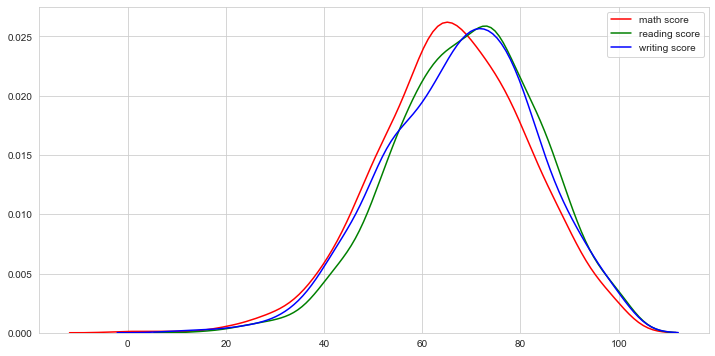

In [144]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['math score'] , color='r' )
sns.kdeplot(df['reading score'] ,  color='g' )
sns.kdeplot(df['writing score'] , color='b')

In [156]:
round(df['math score'].mean() + df['reading score'].mean() + df['writing score'].mean(),2) / 3

67.77

### We can observe that all three curves are meeting at a point which is approximately 67.7706.

### Which also states that an average of student total score is 67.77.
### Students score best in Reading.

# Further we will explore the relationship between features.